In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/Dataset01-CoffeeAndCode/CoffeeAndCode.csv')
df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [4]:
df.shape

(100, 9)

In [6]:
df.nunique()

CodingHours            10
CoffeeCupsPerDay        8
CoffeeTime              7
CodingWithoutCoffee     3
CoffeeType              8
CoffeeSolveBugs         3
Gender                  2
Country                 1
AgeRange                5
dtype: int64

## Gender

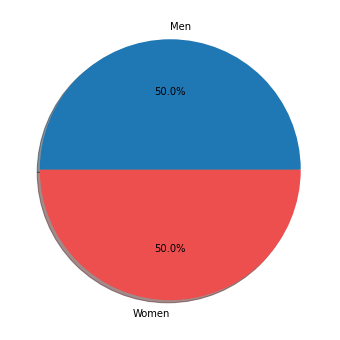

In [14]:
mens = df['Gender'].shape[0]
womens = df['Gender'].shape[0]
plt.figure(figsize=(18,6))
plt.pie([mens,womens],labels=['Men','Women'],shadow=True,autopct='%1.1f%%',colors=['#1F77B4','#ed4e4e']);

Text(0, 0.5, 'People')

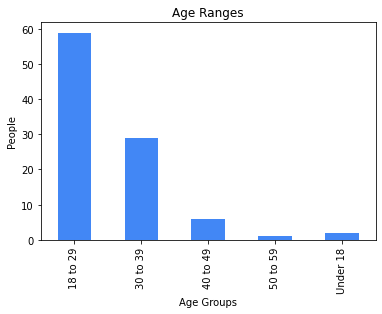

In [52]:
df['AgeRange'].dropna( axis = 'index', inplace=True )
ageranges = df.groupby('AgeRange').size()
ageranges.plot.bar(title='Age Ranges', color='#4287f5'); plt.xlabel('Age Groups'); plt.ylabel('People')  
# ageranges.bar_label()
# fig, ax = plt.subplots(figsize = (10,5))
# ax.bar(ind,menMeans,width=0.4)